<a href="https://colab.research.google.com/github/m123m12/credit-card-default-prediction/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Credit-Card-Default-Prediction**

**Name:GRANDHI MADHAVA NAIDU**

**Project Description:**

**Business Context:**

The project is aimed at predicting the case of customers default payments in

Tiwan.From the perspective of risk management,the result of predictive accuracy

of the estimated probability of default will be more valuable than the binary 

result of classification-credible or not credible clients.We can use the Case 

K-S chart to evaluate which customers will default on their credfit card 

payments.

**Business Objective:**

This project is aims to create a predictive model that will help banks to 

predict whether the user default next month.Which will further help them to 

take prevention measures.

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,precision_score, recall_score, classification_report, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
#Loading the file
card_data=pd.read_csv("/content/drive/MyDrive/default of credit card clients.xls - Data.csv",header=1)

In [3]:
#check the information of the dataset
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
#check the description of the dastaset
card_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
#check the first five rows of the data set
card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#check the last five rows of the dataset
card_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
#check the duplicate values in dataset
len(card_data[card_data.duplicated()])


0

There is no duplicated values in given dataset.

In [8]:
#checking the missing values/null values in dataset
card_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no missing values in given dataset.

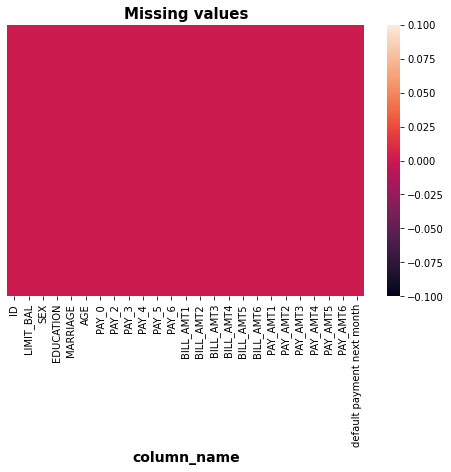

In [9]:
# Visualizing the missing values with heat map
plt.figure(figsize=(8, 5))
sns.heatmap(card_data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values",fontweight="bold",size=15)
plt.show()

In [10]:
card_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Understandinding variables:**

**Variables description:**

* ID: unique ID of each client
* LIMIT_BAL:Amount of the given credit(NT dollar),It includes both the individual consumer credit and his/her family credit
*Gender:1=male,2=female
*Education:1=graduate school,2=university,3=high school,4=others
*Marital status:1=married,2=single,3=others
*Age:age in years


**History of past payment:**

The measurement scale for the repayment status is:
-2=no consumption,-1=paid in full,0=paid minimum only,1=payment delay for one month,2=payment delay for two months.....
* PAY_0:repayment status in September 2005
* PAY_2:repayment status in August 2005
* PAY_3:repayment status in July 2005
* PAY_4:repayment status in June 2005
* PAY_5:repayment status in May 2005
* PAY_6:repayment status in April 2005
 

**Amount of bill statement(NT dollar):**
 
BILL_AMT1: Amount of bill statement in September, 2005

BILL_AMT2: Amount of bill statement in August, 2005

BILL_AMT3: Amount of bill statement in July, 2005

BILL_AMT4: Amount of bill statement in June, 2005

BILL_AMT5: Amount of bill statement in May, 2005

BILL_AMT6: Amount of bill statement in April, 2005

**Amount of previous payment(NT dollar)**


PAY_AMT1: Amount of previous payment in September, 2005

PAY_AMT2: Amount of previous payment in August, 2005

PAY_AMT3: Amount of previous payment in July, 2005

PAY_AMT4: Amount of previous payment in June, 2005

PAY_AMT5: Amount of previous payment in May, 2005

PAY_AMT6: Amount of previous payment in April, 2005

default payment next month: Default payment (1=yes, 0=no)

**Data wrangling:**

In [11]:
# Write your code to make your dataset analysis ready.
#renaming dependendent Variable
card_data.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
#Changing name of some columns for simplicity and better understanding
card_data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
card_data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
card_data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
#Dropping ID column because there is no use of ID further.
card_data.drop('ID',axis=1,inplace=True)
     


In [12]:
#create a copy
card_data1=card_data.copy()

In [13]:
#check the first five rows
card_data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
#replacing values with the labels
card_data.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
card_data.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'others',5 : 'others',6 : 'others',0 : 'others'}}, inplace=True)
card_data.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'others',0 : 'others'}}, inplace = True)
card_data.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)
     

In [15]:
#check the first five rows
card_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,Yes
1,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
